Problem Statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import NuSVR,SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

###### Uploading dataset

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.10,37.80,69.20,22.10
1,2,44.50,39.30,45.10,10.40
2,3,17.20,45.90,69.30,9.30
3,4,151.50,41.30,58.50,18.50
4,5,180.80,10.80,58.40,12.90


###### unnamed column isn't relevant to the dataset

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


### EDA

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (200, 4)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##### sales is target variable
all column are numeric datatype 

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


mean & median of all column are almost same
There is huge variance in quartile range of all columns which means there are chances of outliers present in them 

#### Checking Correlation

In [8]:
df.corr()['sales']

TV          0.78
radio       0.58
newspaper   0.23
sales       1.00
Name: sales, dtype: float64

<AxesSubplot:>

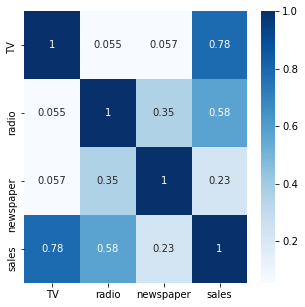

In [9]:
plt.figure(figsize=[5,5])
sns.heatmap(df.corr(),annot=True,cmap='Blues')

tv is most correlated with sales

#### check normal distribution

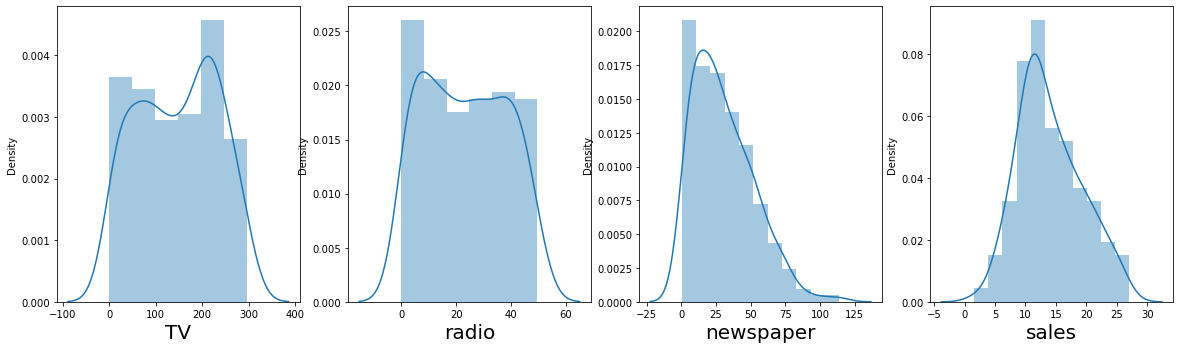

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

###### newspaper and sales column have normal dist plot. newspaper has positive bias in it. tv is a bimodal plot. radio is close to rectangular plot

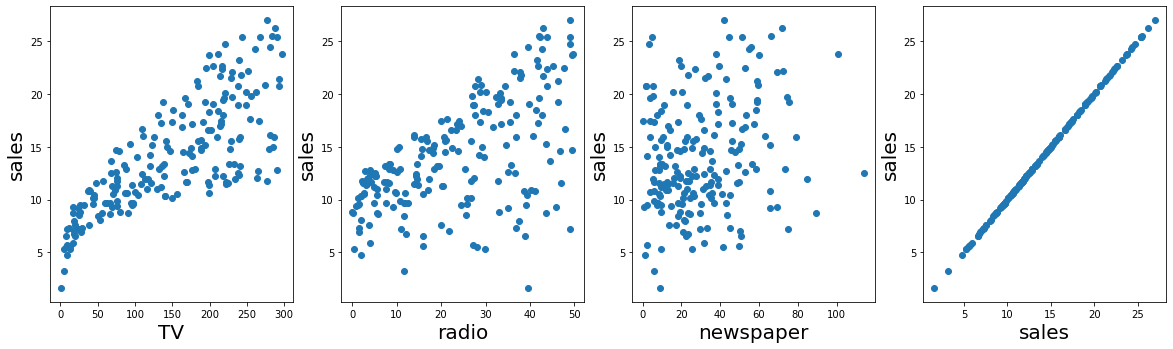

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(df[i],df['sales'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.show()

###### tv and radio have proper linear relation with sales column. newspaper datapoints are scattered with respect to sales column

In [12]:
df=df.drop(['newspaper'],axis=1)
df

,TV,radio,sales
0,230.10,37.80,22.10
1,44.50,39.30,10.40
2,17.20,45.90,9.30
3,151.50,41.30,18.50
4,180.80,10.80,12.90
...,...,...,...
195,38.20,3.70,7.60
196,94.20,4.90,9.70
197,177.00,9.30,12.80
198,283.60,42.00,25.50


###### newspaper has lowest correlation so it can be dropped

#### checking outliers

TV          AxesSubplot(0.125,0.125;0.227941x0.755)
radio    AxesSubplot(0.398529,0.125;0.227941x0.755)
sales    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

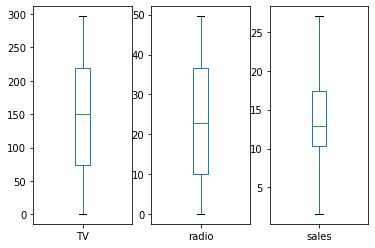

In [13]:
df.plot(kind='box',subplots=True,layout=(1,3))

##### no outliers present 
check for multicolinearity

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(df.drop(['sales'],axis=1).values,i) for i in range(df.drop(['sales'],axis=1).shape[1])]
vif["Features"] = df.drop(['sales'],axis=1).columns
vif

,vif,Features
0,2.24,TV
1,2.24,radio


##### no multicollinearity present

In [17]:
y = df[['sales']]
x = df.drop(columns = ['sales'],axis=1)

###### check for biasing 

In [18]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

TV      -0.07
radio    0.09
dtype: float64
0


###### no biasing

###### feature scaling

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

##### finding best random state

In [21]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=i)
    mod= LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.940187626114006 on random state 154


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 2)
(60, 2)
(140, 1)
(60, 1)


##### 70% of the data (140 rows) will be available for training the model & 30% (60 rows) will be available for testing the model

### Model Building & Evaluation

In [24]:
etr=ExtraTreeRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

1.0

In [28]:
pred=etr.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9714919860894267
mean absolute error 0.7116666666666667
mean squarred error 0.8904999999999998
Root mean square error 0.9436630754670863


In [30]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9960501330088226

In [31]:
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9876328153935806
mean absolute error 0.45355
mean squarred error 0.38631164999999895
Root mean square error 0.6215397412877144


In [32]:
bg=BaggingRegressor()
bg.fit(x_train,y_train)
bg.score(x_train,y_train)

0.9948982436396107

In [33]:
pred=bg.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9870473414618551
mean absolute error 0.5066666666666669
mean squarred error 0.4045999999999997
Root mean square error 0.6360817557515698


In [34]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.9985306934242045

In [35]:
pred=gb.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9796016122547186
mean absolute error 0.5872013928579006
mean squarred error 0.6371809816058757
Root mean square error 0.7982361690664459


In [38]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.9744700396858461

In [39]:
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9768433612778505
mean absolute error 0.5883333333333329
mean squarred error 0.7233399999999999
Root mean square error 0.850493974111516


based on R2 score and other evaluation parameter such as MAE, MSE,RMSE , Random forest regression is best model

### Cross Validation to imporve model accuracy

In [40]:
etrscores =cross_val_score(etr,X_scaled,y,cv=5)
print(etrscores)
print(etrscores.mean(),etrscores.std())

[0.92171382 0.97380234 0.92287623 0.95447457 0.96630651]
0.9478346950076924 0.02174782614543627


In [41]:
rfscores =cross_val_score(rf,X_scaled,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.9827121  0.98626837 0.96958832 0.96161115 0.98568093]
0.9771721708819154 0.009853840163703333


In [42]:
bgscores =cross_val_score(bg,X_scaled,y,cv=5)
print(bgscores)
print(bgscores.mean(),bgscores.std())

[0.97870943 0.98274707 0.97055109 0.95382542 0.98194323]
0.9735552468072308 0.01076758570452507


In [43]:
gbscores =cross_val_score(gb,X_scaled,y,cv=5)
print(gbscores)
print(gbscores.mean(),gbscores.std())

[0.9833708  0.98672401 0.96728806 0.96580283 0.98926287]
0.9784897130272091 0.009941059792986252


In [44]:
knscores =cross_val_score(kn,X_scaled,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[0.98470644 0.97295648 0.97716913 0.91436911 0.98492547]
0.9668253236630152 0.026621755702870138


##### the difference between the accuracy score of algorithim before and after the cross validation is minimum in RandomForestRegressor

### HyperParameter tuning

In [45]:
parameter={'max_depth':np.arange(1,10),'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}

In [46]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [47]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [48]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'auto'}

In [52]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20,random_state=i)
    mod= RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9917695972250048 on random state 112


In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y,random_state = 112,test_size=0.20,shuffle=True)
model=RandomForestRegressor(max_depth=8,criterion='mae',max_features='auto')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.9895536105420705
mean absolute error: 0.4095250000000014
mean squared error: 0.27992608750000136
root mean square error: 0.5290804168555111
cross val score 0.979209559589204
std err 0.01100278554127995


### Saving the best Model

In [55]:
joblib.dump(model,'SalesPrediction.obj')

['SalesPrediction.obj']